# Real-time data processing and analytics using Kafka and Pyspark

# Team Members  

Name: Veera Lohit Madhuvarsu

Email: vmadh002@odu.edu



Name: Gopi Oddiraju


Email: goddi002@odu.edu

# **Abstract**

Real-time temperature data processing is a crucial aspect in many applications, including weather forecasting, environmetal monitoring, and industrial processes. The ability to quickly and accurately process temperature data in real-time provides valuable information for decision making. In this project, we will be working on real-time analysis of temperature data collected across the United States from IoT sensors. Each state in U.S. has many temperature sensors installed. Each sensor provides temperature data on a regualr basis to a kafka server. Every three seconds, the kafka client retrieves the streaming data. Pyspark will be used to process and analyze them in real-time.  

# Goal

The project's main objective is to explore Kafka and PySpark and to use the functionalities offered by them on the data we've choosen.
Analyze the real-time data to find:

Total number of sensors by each state.

Average temperature by each state.

Total number of messages processed.

Total number of sensors.

# Project Timeline

**Preparation of Abstract**: 02/01/2023 - 02/10/2023

**Generating data in json format from sensors**: 02/11/2023 - 02/20/2023

**Installing and setting up Kafka**: 02/21/2023 - 02/28/2023

**Settingup Pyspark environment**: 03/01/2023 - 03/10/2023

**Sending data to Kafka server from sensors**: 03/11/2023 - 03/20/2023

**Data Analysis**: 03/21/2023 - 04/10/2023

**Final modification and Draft Report**: 04/11/2023 - 04/19/2023

**Final Report**: 04/20/2023 - 04/24/2023


# **Team members contribution plan**

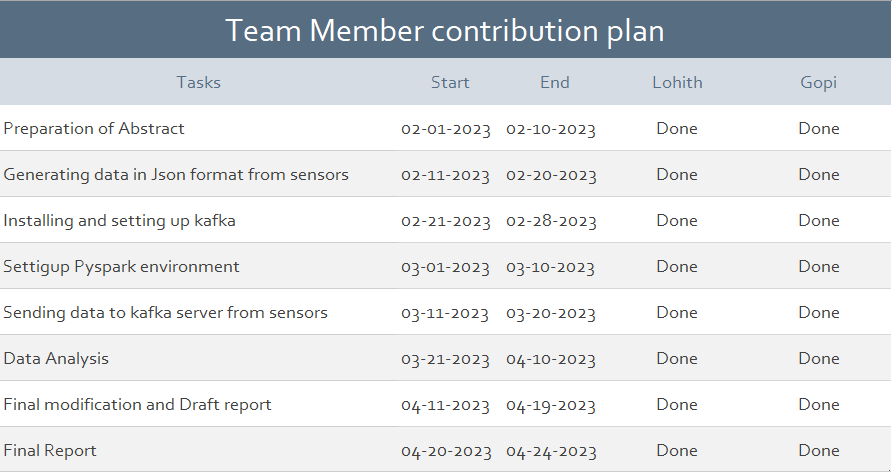

# Data Source

There are several APIs that provide temperature data for different regions and time intervals. Here are a few examples:


OpenWeatherMap: OpenWeatherMap provides real-time and forecasted temperature data for cities all over the world. Their API is free to use for up to 60 calls per minute, with paid plans available for higher usage. You can find their documentation and API key signup on their website: https://openweathermap.org/api.


Weather Underground: Weather Underground provides weather data for locations all over the world, including temperature. They have both free and paid plans available, with their free plan providing up to 500 calls per day. You can find their documentation and API key signup on their website: https://www.wunderground.com/weather/api.


AccuWeather: AccuWeather provides real-time and forecasted temperature data for locations all over the world. They have both free and paid plans available, with their free plan providing up to 50 calls per day. You can find their documentation and API key signup on their website: https://developer.accuweather.com/apis.


National Weather Service: The National Weather Service provides temperature data for various locations in the US. They have an API that provides access to this data, along with other weather data such as precipitation and wind speed. Their API is free to use, with no API key required. You can find their documentation and API access on their website: https://www.weather.gov/documentation/services-web-api.


# Simulated Sensor Data

Using simulated sensor data as a starting point can be beneficial in a coursework setting for two reasons.


1.It allows you to test our code and algorithms without relying on external data sources that may not always be available or reliable.

2.This approach also gives us more control over the data and can allow us to generate specific scenarios that may be difficult to recreate with real-world data.

Once we have developed and tested our code using simulated sensor data, we can then replace it with data from an API. This allows us to validate our code with real-world data and refine our algorithms to better handle the variability and noise that may be present in the data.



# IoT Simulator Code

The below code generates simulated IoT sensor data in JSON format. It simulates temperature sensor data for a number of IoT devices, where each device is represented by a unique guid. The script takes a command-line argument <number> to specify the number of JSON messages to generate.

The code initializes some dictionaries to store the current state and temperature of each device, as well as a dictionary with the average temperature for each US state. Then it loops num_msgs times and generates a random guid, selects a random US state, and calculates a random temperature value based on the current temperature of the device in the selected state. The temperature value is then included in a JSON message, along with the guid, a destination ID, and a timestamp.

The resulting JSON messages have the following structure:

{
    "guid": "<random_device_guid>",
    "destination": "0-AAA12345678",
    "state": "<random_US_state>",
    "eventTime": "<current_timestamp>",
    "payload": {
        "format": "urn:example:sensor:temp",
        "data": {
            "temperature": <random_temperature_value>
        }
    }
}


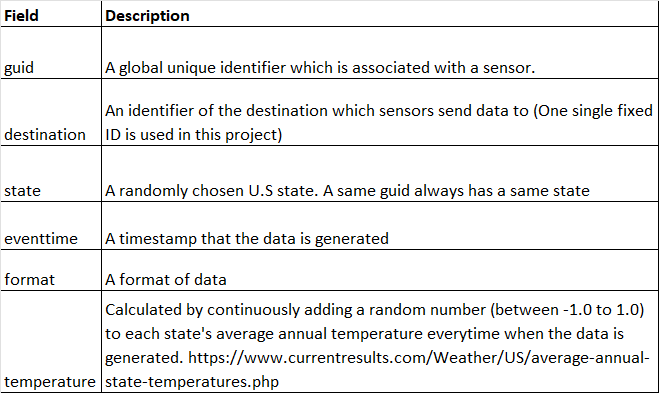

In [ ]:
import sys
import os
import datetime
import random
from random import randrange
import re
import copy


# Set number of simulated messages to generate
num_msgs = int(input())

# mapping of a guid and a state {guid: state}
device_state_map = {}

# average annual temperature of each state
temp_base = {'WA': 48.3, 'DE': 55.3, 'DC': 58.5, 'WI': 43.1,
		  'WV': 51.8, 'HI': 70.0, 'FL': 70.7, 'WY': 42.0,
		  'NH': 43.8, 'NJ': 52.7, 'NM': 53.4, 'TX': 64.8,
		  'LA': 66.4, 'NC': 59.0, 'ND': 40.4, 'NE': 48.8,
		  'TN': 57.6, 'NY': 45.4, 'PA': 48.8, 'CA': 59.4,
		  'NV': 49.9, 'VA': 55.1, 'CO': 45.1, 'AK': 26.6,
		  'AL': 62.8, 'AR': 60.4, 'VT': 42.9, 'IL': 51.8,
		  'GA': 63.5, 'IN': 51.7, 'IA': 47.8, 'OK': 59.6,
		  'AZ': 60.3, 'ID': 44.4, 'CT': 49.0, 'ME': 41.0,
		  'MD': 54.2, 'MA': 47.9, 'OH': 50.7, 'UT': 48.6,
		  'MO': 54.5, 'MN': 41.2, 'MI': 44.4, 'RI': 50.1,
		  'KS': 54.3, 'MT': 42.7, 'MS': 63.4, 'SC': 62.4,
		  'KY': 55.6, 'OR': 48.4, 'SD': 45.2}

# latest temperature measured by sensors {guid: temperature}
current_temp = {}

# Fixed values
guid_base = "0-ZZZ12345678-"
destination = "0-AAA12345678"
format = "urn:example:sensor:temp"

# Choice for random letter
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

iotmsg_header = """\
{ "guid": "%s",
  "destination": "%s",
  "state": "%s", """

iotmsg_eventTime = """\
  "eventTime": "%sZ", """

iotmsg_payload ="""\
  "payload": {"format": "%s", """

iotmsg_data ="""\
	 "data": { "temperature": %.1f  }
	 }
}"""

##### Generate JSON output:
if __name__ == "__main__":
    for counter in range(0, num_msgs):
        rand_num = str(random.randrange(0, 9)) + str(random.randrange(0, 9))
        rand_letter = random.choice(letters)
        temp_init_weight = random.uniform(-5, 5)
        temp_delta = random.uniform(-1, 1)

        guid = guid_base + rand_num + rand_letter
        state = random.choice(list(temp_base.keys()))

        if (not guid in device_state_map): # first entry
            device_state_map[guid] = state
            current_temp[guid] = temp_base[state] + temp_init_weight

        elif (not device_state_map[guid] == state):        # The guid already exists but the randomly chosen state doesn't match
            state = device_state_map[guid]

        temperature = current_temp[guid] + temp_delta
        current_temp[guid] = temperature  # update current temperature
        today = datetime.datetime.today()
        datestr = today.isoformat()

        print(re.sub(r"[\s+]", "", iotmsg_header) % (guid, destination, state), end='')
        print(re.sub(r"[\s+]", "", iotmsg_eventTime) % (datestr), end='')
        print(re.sub(r"[\s+]", "", iotmsg_payload) % (format), end='')
        print(re.sub(r"[\s+]", "", iotmsg_data) % (temperature))


5
{"guid":"0-ZZZ12345678-66O","destination":"0-AAA12345678","state":"IA","eventTime":"2023-04-25T05:02:07.525967Z","payload":{"format":"urn:example:sensor:temp","data":{"temperature":48.5}}}
{"guid":"0-ZZZ12345678-87N","destination":"0-AAA12345678","state":"OK","eventTime":"2023-04-25T05:02:07.529230Z","payload":{"format":"urn:example:sensor:temp","data":{"temperature":59.4}}}
{"guid":"0-ZZZ12345678-66O","destination":"0-AAA12345678","state":"IA","eventTime":"2023-04-25T05:02:07.532465Z","payload":{"format":"urn:example:sensor:temp","data":{"temperature":49.4}}}
{"guid":"0-ZZZ12345678-01T","destination":"0-AAA12345678","state":"NV","eventTime":"2023-04-25T05:02:07.533823Z","payload":{"format":"urn:example:sensor:temp","data":{"temperature":54.8}}}
{"guid":"0-ZZZ12345678-40Q","destination":"0-AAA12345678","state":"AZ","eventTime":"2023-04-25T05:02:07.533944Z","payload":{"format":"urn:example:sensor:temp","data":{"temperature":63.7}}}


# Installation and Setup

We installed and setup Kakfa and Spark on ODU HPC.




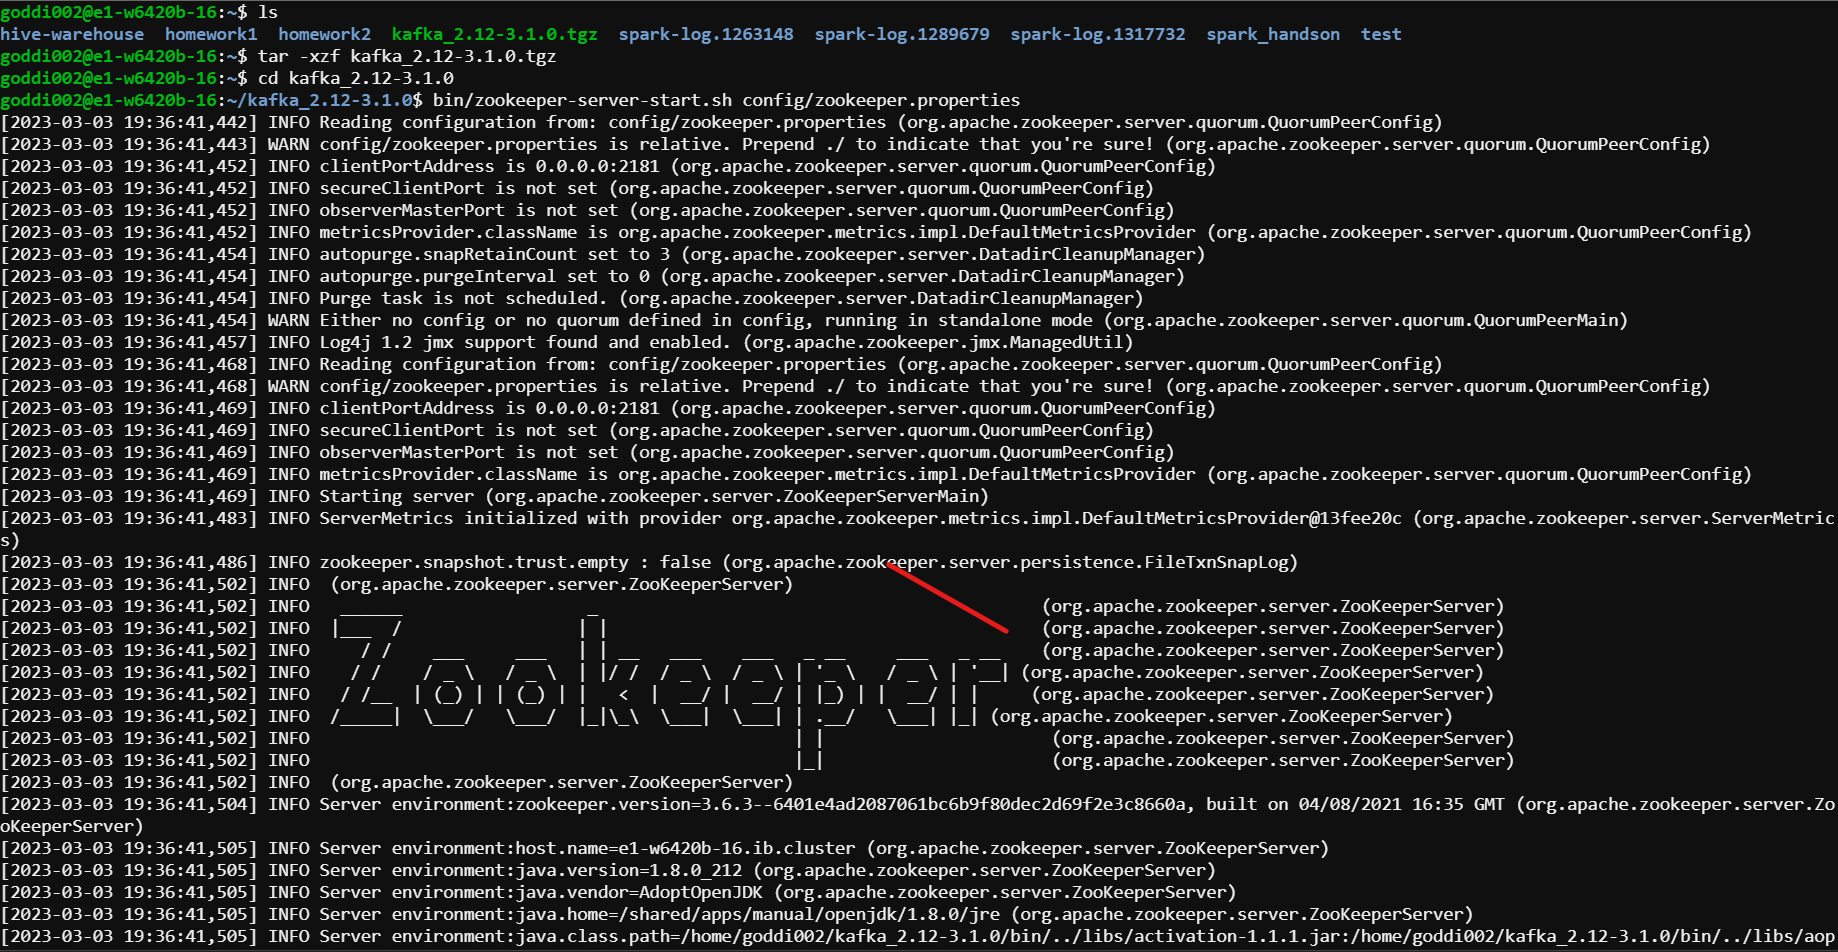







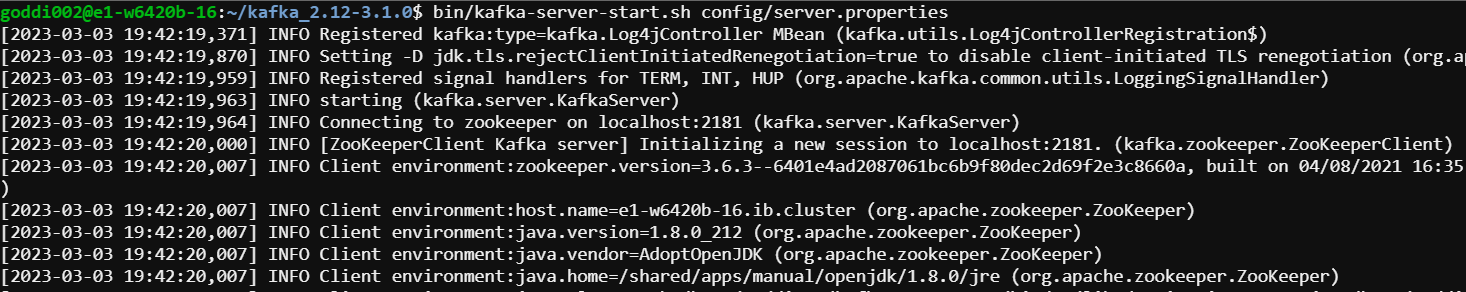





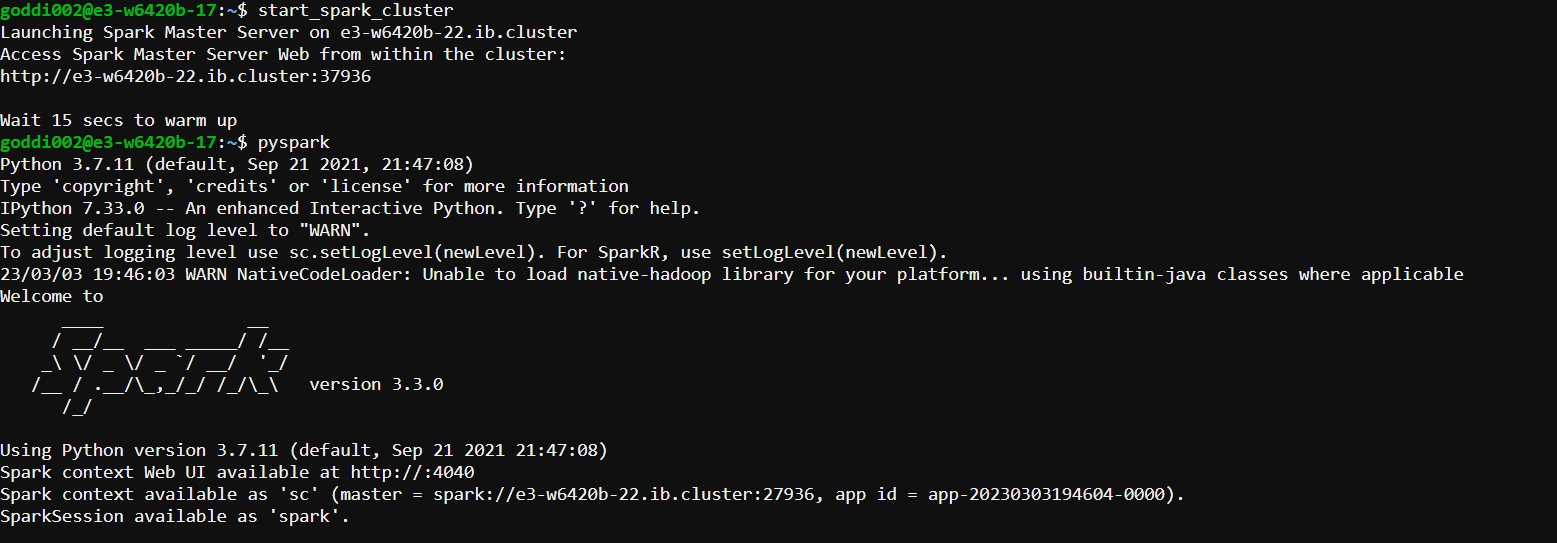


# Summary

We have so far outlined the project's goals, objectives, and projected results. We made the data sources available. We provided a python code which generates simulated IoT sensor data in JSON format along with the sample data. We installed and setup Kakfa and Spark on ODU HPC and included those screenshots.



The next step is to analyze the data. We'll explore Kafka and PySpark and use them to analyze the data. We'll determine the average temperature for each state in the analysis. The total number of messages processed will be determined. We'll find out the number of sensors by each state and the total number of sensors.


At last, We'll generate a report summarizing our findings with a thorough explanation of our methodology, findings, and conclusions.

In [ ]:
!pip install kafka-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 5.5 MB/s eta 0:00:00


# **Download and Setup Kafka and Zookeeper Instances**

In [ ]:
!curl -sSOL https://downloads.apache.org/kafka/3.4.0/kafka_2.12-3.4.0.tgz
!tar -xzf kafka_2.12-3.4.0.tgz

In [ ]:
!./kafka_2.12-3.4.0/bin/zookeeper-server-start.sh -daemon ./kafka_2.12-3.4.0/config/zookeeper.properties
!./kafka_2.12-3.4.0/bin/kafka-server-start.sh -daemon ./kafka_2.12-3.4.0/config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


In [ ]:
!ps -ef | grep kafka

root         917       1 14 20:23 ?        00:00:02 java -Xmx512M -Xms512M -server -XX:+UseG1GC -XX:MaxGCPauseMillis=20 -XX:InitiatingHeapOccupancyPercent=35 -XX:+ExplicitGCInvokesConcurrent -XX:MaxInlineLevel=15 -Djava.awt.headless=true -Xlog:gc*:file=/content/kafka_2.12-3.4.0/bin/../logs/zookeeper-gc.log:time,tags:filecount=10,filesize=100M -Dcom.sun.management.jmxremote -Dcom.sun.management.jmxremote.authenticate=false -Dcom.sun.management.jmxremote.ssl=false -Dkafka.logs.dir=/content/kafka_2.12-3.4.0/bin/../logs -Dlog4j.configuration=file:./kafka_2.12-3.4.0/bin/../config/log4j.properties -cp /content/kafka_2.12-3.4.0/bin/../libs/activation-1.1.1.jar:/content/kafka_2.12-3.4.0/bin/../libs/aopalliance-repackaged-2.6.1.jar:/content/kafka_2.12-3.4.0/bin/../libs/argparse4j-0.7.0.jar:/content/kafka_2.12-3.4.0/bin/../libs/audience-annotations-0.5.0.jar:/content/kafka_2.12-3.4.0/bin/../libs/commons-cli-1.4.jar:/content/kafka_2.12-3.4.0/bin/../libs/commons-lang3-3.8.1.jar:/content/kafka_2.12

In [ ]:
import os
from datetime import datetime
import time
import threading
import json
from kafka import KafkaProducer
from kafka.errors import KafkaError
import pandas as pd

Creating a Kafka topic with 1 partition and replication factor1

In [ ]:
!./kafka_2.12-3.4.0/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic IOT


Created topic IOT.


Describe the topic for details on the configuration

In [ ]:
!./kafka_2.12-3.4.0/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic IOT

Topic: IOT	TopicId: _tb-jpybQBWOwhUkMvAJZA	PartitionCount: 1	ReplicationFactor: 1	Configs: 
	Topic: IOT	Partition: 0	Leader: 0	Replicas: 0	Isr: 0


# Store the Data in Kafka

Kafka being an event streaming platform, enables  data from various sources to be written into it. For instance:

- Web traffic logs
- Astronomical measurements
- IoT sensor data
- Product reviews and many more.

In this project, we are using simulated sensor data and feed the data into kafka manually.
Storing the data in kafka simulates an environment for continuous remote data retrieval.

We uploaded the python script sensor_data.py to the collab and using it to feed the data to Kafka.

In [ ]:
data=!python sensor_data.py
print(data[1:])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
def error_callback(exc):
    raise Exception('Error while sending data to Kafka: {0}'.format(str(exc)))

def write_to_kafka(topic_name, items):
    count = 0
    producer = KafkaProducer(bootstrap_servers=['127.0.0.1:9092'])
    for item in items:
        #message = json.loads(item) # Convert the dictionary to a JSON-encoded string
        key = str(count) # Use a simple key based on the message count
        producer.send(topic_name, key=key.encode('utf-8'), value=item.encode('utf-8')).add_errback(error_callback)
        count += 1
    producer.flush()
    print("Wrote {0} messages into topic: {1}".format(count, topic_name))


In [ ]:
write_to_kafka("IOT",data[1:])

Wrote 10000 messages into topic: IOT


In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=90e565a34df11a0d185ec8efb6e4aa88d723cd8a2e7aacc04bdc050a4e21ffcc
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SparkSession


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import from_json
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, DoubleType
from kafka import KafkaConsumer

# Create a Kafka consumer
messages=!kafka_2.12-3.4.0/bin/kafka-console-consumer.sh --bootstrap-server 127.0.0.1:9092 --topic IOT --from-beginning

# Create a SparkSession
spark = SparkSession.builder.appName('kafka_processing').getOrCreate()
sc=spark.sparkContext


# Define the schema for the incoming JSON data
schema = StructType([
    StructField("guid", StringType()),
    StructField("destination", StringType()),
    StructField("state", StringType()),
    StructField("eventTime", TimestampType()),
    StructField("payload", StructType([
        StructField("format", StringType()),
        StructField("data", StructType([
            StructField("temperature", DoubleType())
        ]))
    ]))
])


# Create a PySpark DataFrame from the messages
df = spark.createDataFrame(messages, StringType())
df.show(truncate=False)

# Extract the fields
json_df = df.select(from_json(df.value, schema).alias('data')).select('data.*')
json_df=json_df.na.drop()
json_df.show(truncate=False)



+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|value                                                                                                                                                                                       |
+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|{"guid":"0-ZZZ12345678-83V","destination":"0-AAA12345678","state":"AL","eventTime":"2023-04-25T20:24:33.971301Z","payload":{"format":"urn:example:sensor:temp","data":{"temperature":58.2}}}|
|{"guid":"0-ZZZ12345678-30V","destination":"0-AAA12345678","state":"SC","eventTime":"2023-04-25T20:24:33.971558Z","payload":{"format":"urn:example:sensor:temp","data":{"temperature":66.9}}}|
|{"guid":"0-ZZZ12345678-68B","destination":"0

# Summary

We have so far outlined the project's goals, objectives, and installation process which involved setting up Spark and Kafka on HPC cluster.However, we later decided to use Google Collab instead for ease of implementation.

During milestone 2, we focused on writing simulated data to kafka and analyzing  using PySpark. We accomplished this by using Kafka producer to feed the data into Kafka and then reading it using PySpark. Currently, we are working on analyzing this data to generate insights.



As we move forward, we will be able to complete our analysis and generate valuable insights from the data. Our goal is to produce a clear and concise report that highlights the key insights from the analysis. This report will be accompanied by a presentation that wil effectively communicate our findings with an explanation of our methodology, findings, and conclusions.

# Processing

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import countDistinct

# create a new column "temparature" to extract the temperature value
json_df.select("payload").show(truncate=False)
df = json_df.withColumn("temparature", col("payload.data.temperature"))
df.show()
from pyspark.sql.functions import avg

#Average tempararture by state
avg_temp=df.groupBy("state")
avg_temp=avg_temp.agg(avg("temparature").alias("avg_temperature"))
avg_temp.show()



# group by state and count number of unique devices
#num_devices_by_state = df.groupBy('state').agg(countDistinct('destination').alias('num_devices'))
num_devices_by_state = df.groupBy('state').count()
num_devices_by_state.show(50)
num_devices_by_state.count()

#Total number of messages
num_of_messages=df.count()
print("Number of messages:",num_of_messages)


# Total number of devices
total_devices = df.select(countDistinct('guid')).collect()[0][0]
print("Total number of devices:", total_devices)


+---------------------------------+
|payload                          |
+---------------------------------+
|{urn:example:sensor:temp, {58.2}}|
|{urn:example:sensor:temp, {66.9}}|
|{urn:example:sensor:temp, {31.1}}|
|{urn:example:sensor:temp, {52.1}}|
|{urn:example:sensor:temp, {52.2}}|
|{urn:example:sensor:temp, {45.0}}|
|{urn:example:sensor:temp, {48.6}}|
|{urn:example:sensor:temp, {62.3}}|
|{urn:example:sensor:temp, {50.3}}|
|{urn:example:sensor:temp, {57.6}}|
|{urn:example:sensor:temp, {47.4}}|
|{urn:example:sensor:temp, {43.6}}|
|{urn:example:sensor:temp, {56.0}}|
|{urn:example:sensor:temp, {51.5}}|
|{urn:example:sensor:temp, {59.5}}|
|{urn:example:sensor:temp, {51.4}}|
|{urn:example:sensor:temp, {56.8}}|
|{urn:example:sensor:temp, {32.3}}|
|{urn:example:sensor:temp, {47.1}}|
|{urn:example:sensor:temp, {75.4}}|
+---------------------------------+
only showing top 20 rows

+-----------------+-------------+-----+--------------------+--------------------+-----------+
|             gu

# Final Report

## Real-time data processing and analytics using Kafka and Pyspark

Name: Veera Lohit Madhuvarsu

Email: vmadh002@odu.edu



Name: Gopi Oddiraju


Email: goddi002@odu.edu

In our project, we followed a methodology that involved several steps. First, we generated simulated IoT sensor data using a Python script, which allowed us to simulate a realistic environment for our analysis. Next, we used Kafka to ingest and stream the data, which allowed us to handle the high volume and velocity of the data. Then, we used PySpark to analyze and process the data in real-time, which enabled us to extract meaningful insights. Finally, we visualized the results to provide a clear representation of our findings. This methodology ensured that we could efficiently and accurately analyze the data, and effectively communicate our results.

## Data Analysis

Our project involved conducting four types of real-time analysis on the generated IoT sensor data.
1. Average temperature in each state: The average temperature in each state at a certain period is shown by this analysis. One can determine whether the temperature is high or low and take the appropriate action by determining the average temperature of each condition. For instance, steps can be done to prevent heat-related diseases if the average temperature in a certain state is greater than usual.
2. Total number of messages: The overall quantity of messages received from various sources is revealed by this study. We can assess the network traffic, use trends, and functionality of the data processing system by keeping track of the total amount of messages.
3. Number of devices in each state: This analysis provides insights into the number of devices present in each state at a given time. By knowing the number of devices present in each state, one can determine the device density in different regions, which can be useful in planning for device deployment, network infrastructure, and resource allocation.
4. Total number of devices: This analysis provides insights into the total number of devices connected to the network at a given time. The device density, consumption patterns, and overall system performance may all be calculated using the total number of connected devices. Resource allocation, network optimization, and capacity planning can all benefit from this knowledge.
By leveraging these real-time analyses, we were able to gain valuable insights and optimize our IoT system. The analyses can be applied to similar systems for further optimization and improvement.

## Visualization

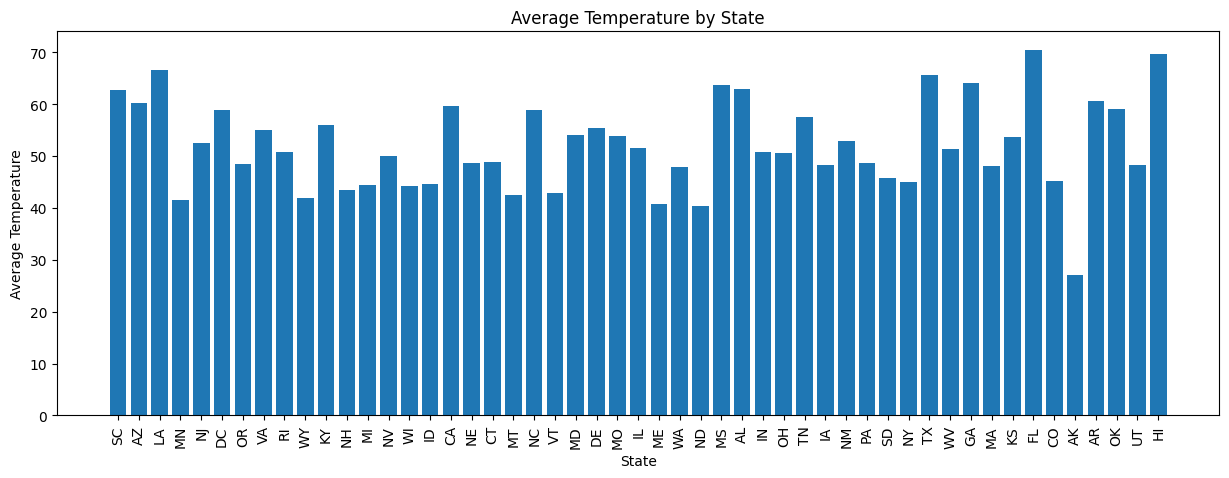

In [ ]:
import matplotlib.pyplot as plt

# get data from PySpark dataframe
states = [row['state'] for row in avg_temp.collect()]
avg_temps = [row['avg_temperature'] for row in avg_temp.collect()]

# create bar chart
plt.figure(figsize=(15,8))
plt.bar(states, avg_temps)
plt.xlabel('State')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by State')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.4)
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

num_devices_by_state_pd = num_devices_by_state.toPandas()
fig = px.choropleth(num_devices_by_state_pd, locations='state', locationmode='USA-states', color='count', scope='usa',color_continuous_scale='Blues', range_color=(0, num_devices_by_state_pd['count'].max()))
fig.update_layout(title='Total Number of Devices by State')
fig.show()


## Future Work

In order to send the analyzed values to a dashboard in real-time, we can use Kafka. To achieve this, the data needs to be formatted into a specific key-value pair format using the KeyedMessage class in Kafka. The Kafka producer API can then be used to send the data to a Kafka topic. Finally, a Kafka consumer API can be utilized in the dashboard application to consume data from the Kafka topic and display it in real-time.

To make the above code send data directly to a Kafka topic, we can modify it by using the producer.send() method to send the data to the desired Kafka topic. For example, for sending the average temperature by state, we can use the sortedTemp RDD and send each partition to the "avgTempByState" topic. Similarly, for other analyzed values like message count and sensor count, we can modify the code to send the data to corresponding Kafka topics. This will allow the analyzed data to be directly sent to a dashboard for real-time visualization and monitoring.

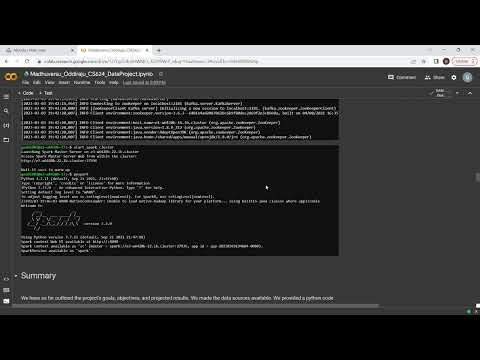

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('QOU_TRzc9uI')
